In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

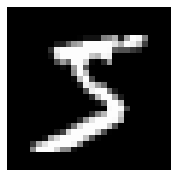

Label: 5


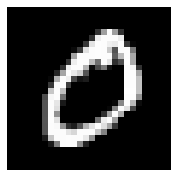

Label: 0


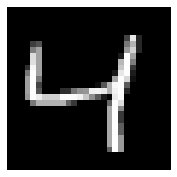

Label: 4


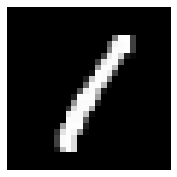

Label: 1


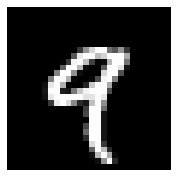

Label: 9


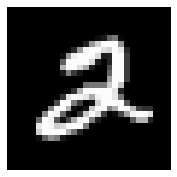

Label: 2


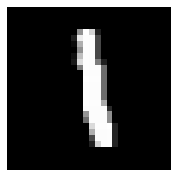

Label: 1


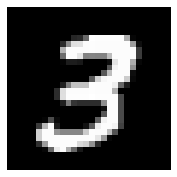

Label: 3


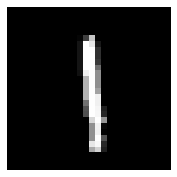

Label: 1


In [21]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Define a function to plot an image
def plot_image(image, figsize=(3, 3)): # Adjust figsize for desired image size
    plt.figure(figsize=figsize)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

# Visualize some training images (modify range for more/less images)
for i in range(9):
    plot_image(x_train[i])
    print(f"Label: {y_train[i]}")

In [22]:
# Reshape for CNN input (28x28 pixels and 1 color channel)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to [0, 1] range
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [23]:
# Convert labels to one-hot vectors for multiclass classification
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # 10 output units for 10 digits
])

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.5059 - loss: 1.3883 - val_accuracy: 0.9225 - val_loss: 0.2695
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9229 - loss: 0.2547 - val_accuracy: 0.9544 - val_loss: 0.1523
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9544 - loss: 0.1535 - val_accuracy: 0.9630 - val_loss: 0.1148
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9655 - loss: 0.1122 - val_accuracy: 0.9749 - val_loss: 0.0826
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9714 - loss: 0.0902 - val_accuracy: 0.9775 - val_loss: 0.0701
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9749 - loss: 0.0831 - val_accuracy: 0.9787 - val_loss: 0.0670
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9798 - loss: 0.0677 - val_accuracy: 0.9777 - val_loss: 0.0717
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9802 - loss: 0

In [27]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 972    0    0    0    1    1    1    2    2    1]
 [   0 1131    1    1    0    0    1    0    1    0]
 [   4    3 1004    2    2    0    0   12    4    1]
 [   0    0    1  978    0   20    0    6    3    2]
 [   0    0    1    0  974    0    0    0    1    6]
 [   1    0    0    1    0  887    1    1    1    0]
 [   7    2    0    1    3   11  934    0    0    0]
 [   1    2    5    1    0    0    0 1012    2    5]
 [  11    0    1    2    1    8    1    5  941    4]
 [   0    3    1    0   10   11    0    3    2  979]]


In [29]:
import numpy as np
accuracy = np.mean(y_test.argmax(axis=1) == y_pred.argmax(axis=1))
print("Accuracy:", accuracy)

Accuracy: 0.9812


In [30]:
# Make predictions on a small subset of test data
predictions = model.predict(x_test[:10])
# Get the predicted class for each sample (argmax gives the index of maximum value)
predicted_classes = predictions.argmax(axis=1)
# Get the actual labels from the one-hot encoded test data
actual_labels = y_test[:10].argmax(axis=1)
# Print the predicted and actual labels for the first 10 samples
print("Sample Predictions and Actual Labels:")
for i in range(10):
    print(f"Sample {i+1}: Predicted: {predicted_classes[i]}, Actual: {actual_labels[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Sample Predictions and Actual Labels:
Sample 1: Predicted: 7, Actual: 7
Sample 2: Predicted: 2, Actual: 2
Sample 3: Predicted: 1, Actual: 1
Sample 4: Predicted: 0, Actual: 0
Sample 5: Predicted: 4, Actual: 4
Sample 6: Predicted: 1, Actual: 1
Sample 7: Predicted: 4, Actual: 4
Sample 8: Predicted: 9, Actual: 9
Sample 9: Predicted: 5, Actual: 5
Sample 10: Predicted: 9, Actual: 9
